In [1]:
#import paskages 
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler 
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
# display head data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Target Distribution

print("Target Distribution:")
print(df['target'].value_counts())

Target Distribution:
1    526
0    499
Name: target, dtype: int64


In [7]:
#check is null data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data vislization  

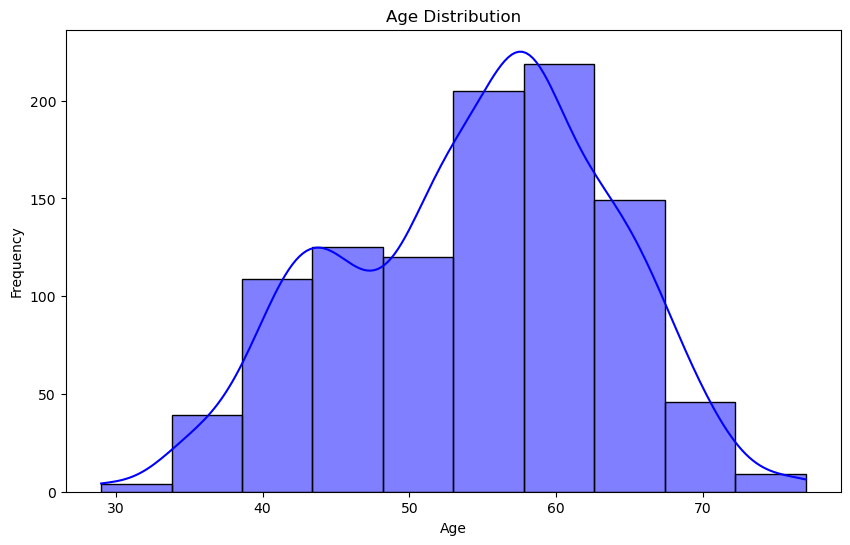

In [8]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], kde=True, bins=10, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

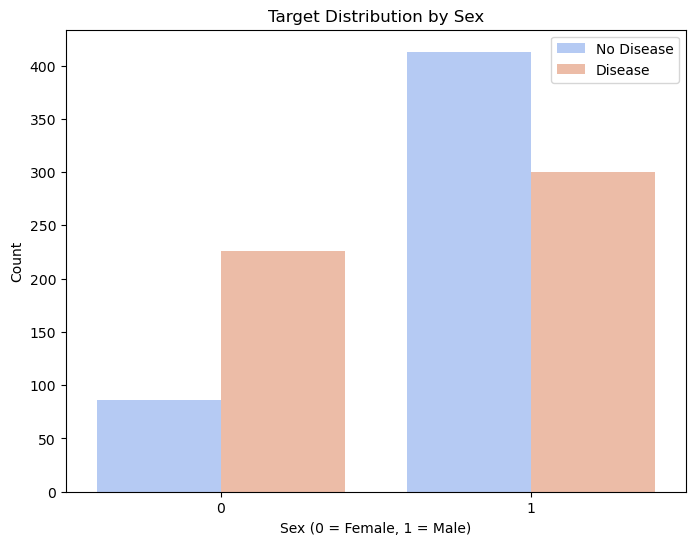

In [9]:
# Target vs. Sex
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="target", data=df, palette="coolwarm")
plt.title("Target Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

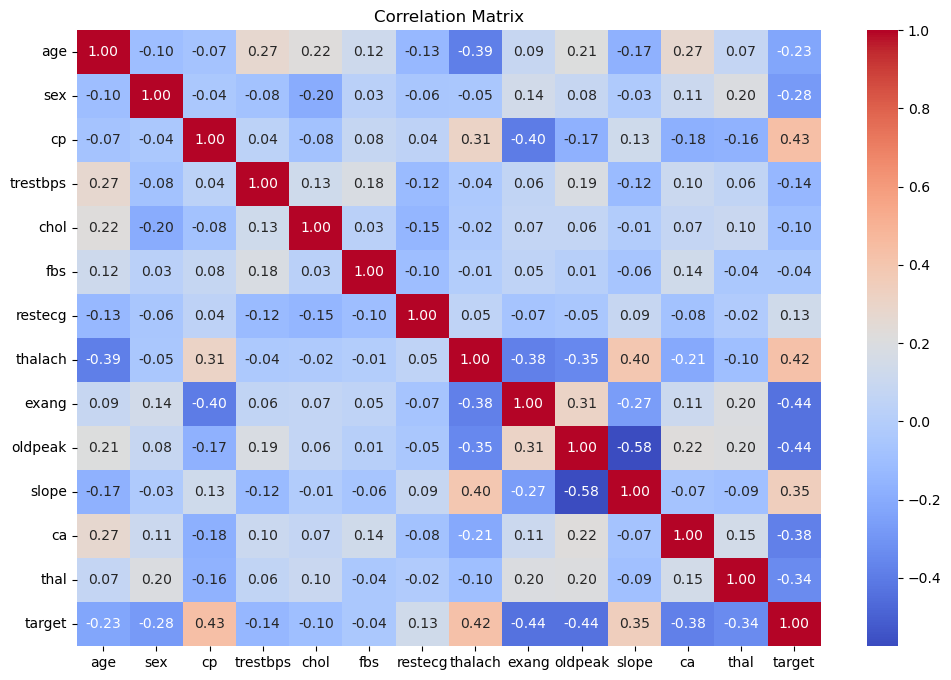

In [10]:
#  Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


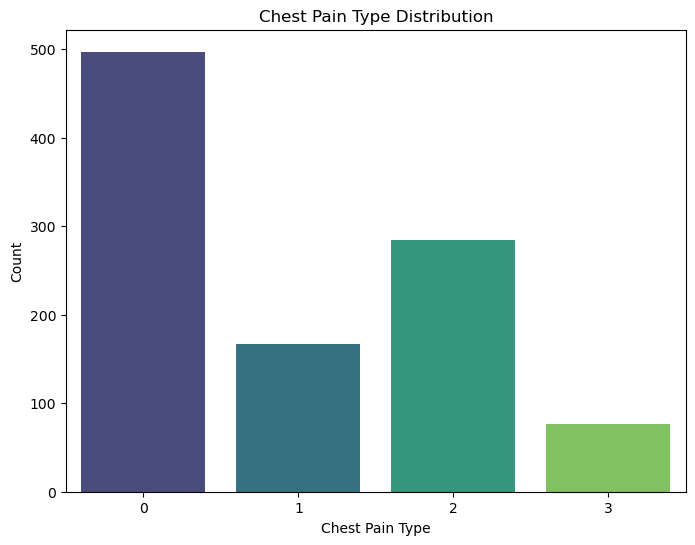

In [11]:
#  Chest Pain Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="cp", data=df, palette="viridis")
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

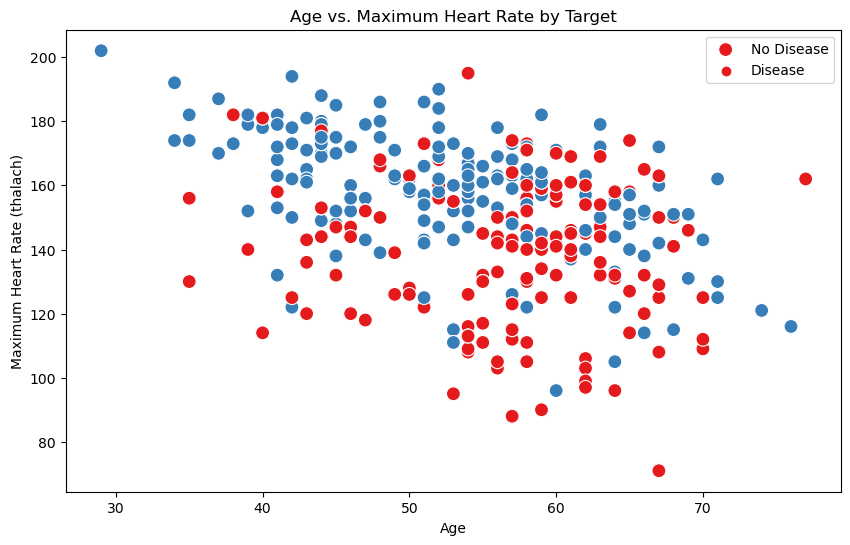

In [12]:
# Scatter Plot for Age vs. Maximum Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="thalach", hue="target", data=df, palette="Set1", s=100)
plt.title("Age vs. Maximum Heart Rate by Target")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["No Disease", "Disease"])
plt.show()

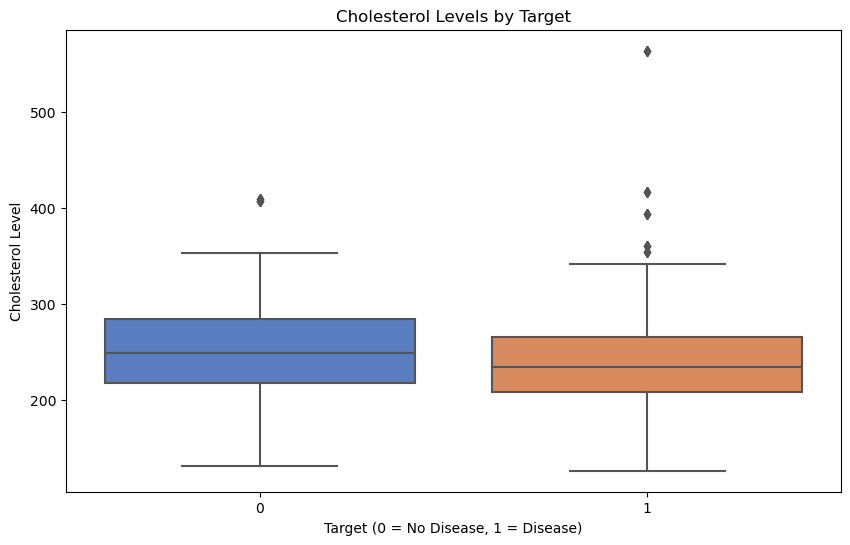

In [13]:
#  Box Plot for Cholesterol by Target
plt.figure(figsize=(10, 6))
sns.boxplot(x="target", y="chol", data=df, palette="muted")
plt.title("Cholesterol Levels by Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Cholesterol Level")
plt.show()

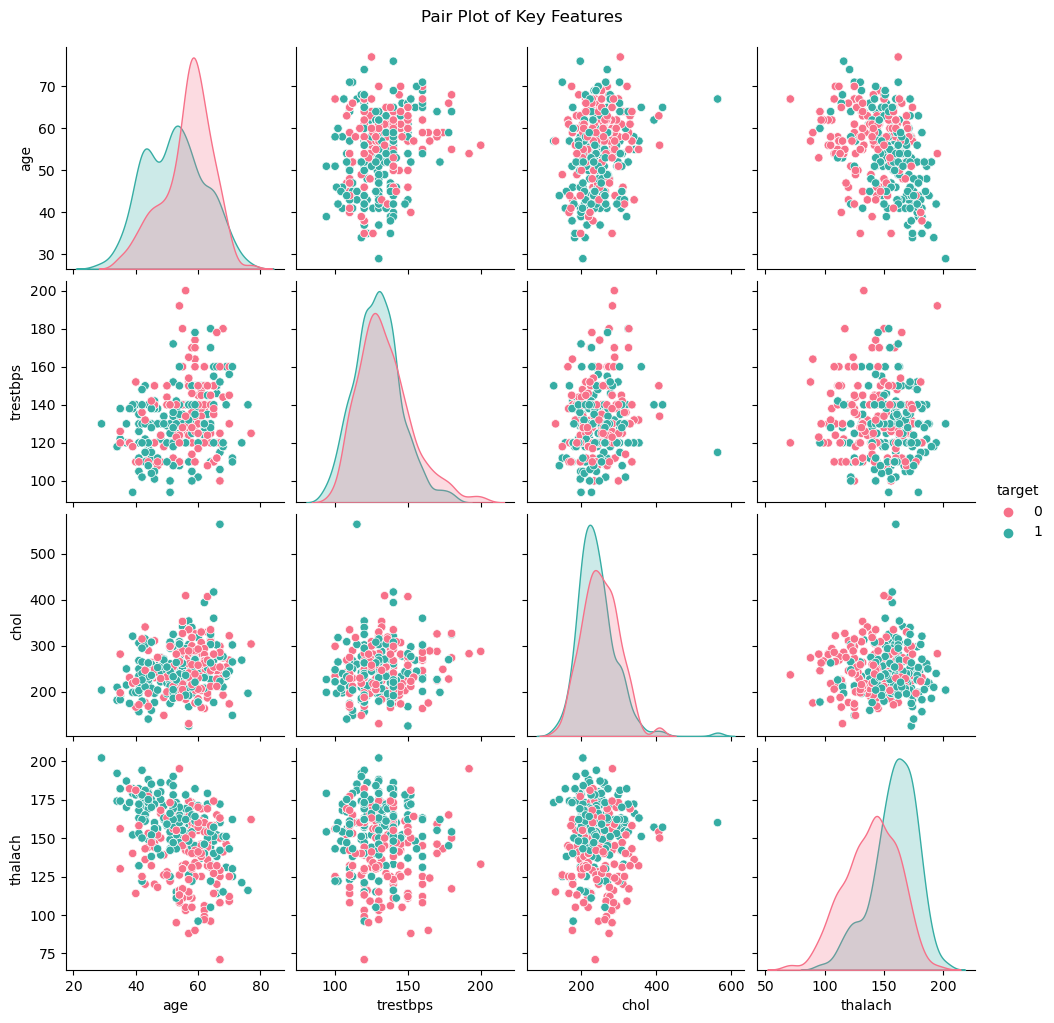

In [14]:
# Pair Plot for Key Features
key_features = ["age", "trestbps", "chol", "thalach", "target"]
sns.pairplot(df[key_features], hue="target", palette="husl", diag_kind="kde")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

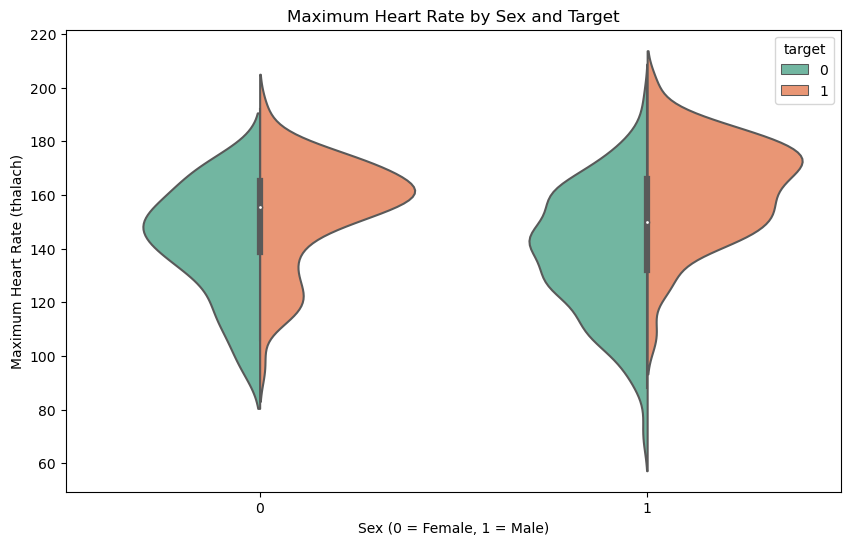

In [15]:
# Violin Plot for Maximum Heart Rate by Sex and Target
plt.figure(figsize=(10, 6))
sns.violinplot(x="sex", y="thalach", hue="target", data=df, split=True, palette="Set2")
plt.title("Maximum Heart Rate by Sex and Target")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.show()

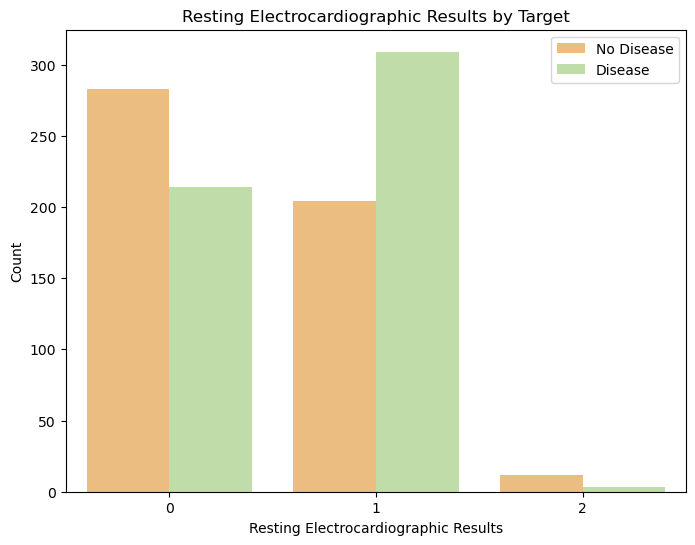

In [16]:
#  Count Plot for Resting Electrocardiographic Results
plt.figure(figsize=(8, 6))
sns.countplot(x="restecg", hue="target", data=df, palette="Spectral")
plt.title("Resting Electrocardiographic Results by Target")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

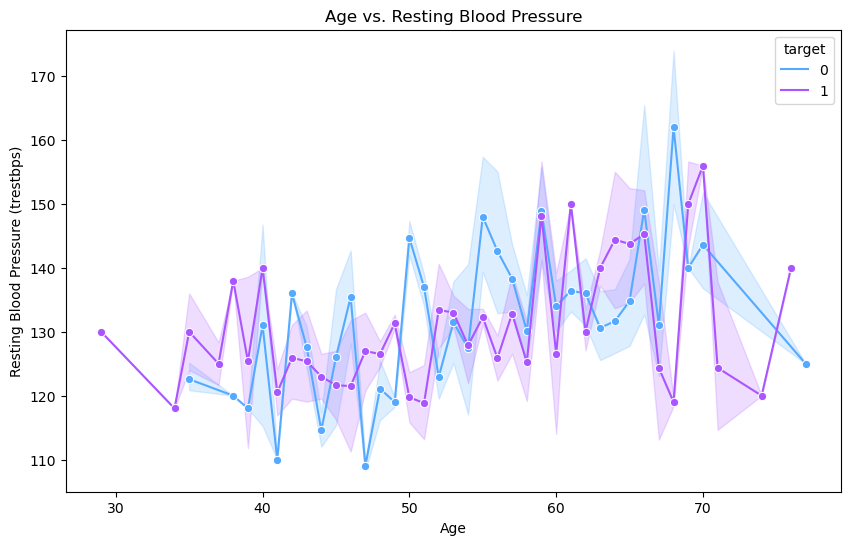

In [17]:
# Line Plot for Age vs. Resting Blood Pressure
plt.figure(figsize=(10, 6))
sns.lineplot(x="age", y="trestbps", hue="target", data=df, marker="o", palette="cool")
plt.title("Age vs. Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.show()


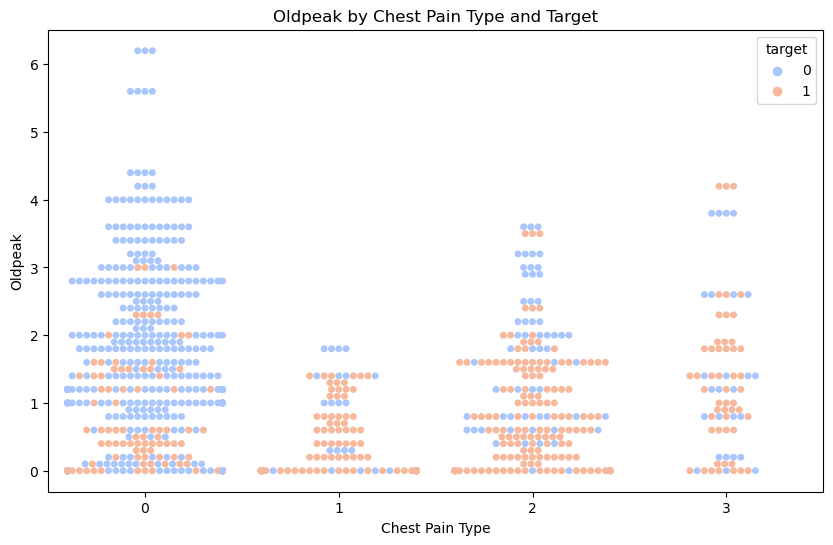

In [18]:
#  Swarm Plot for Oldpeak by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.swarmplot(x="cp", y="oldpeak", hue="target", data=df, palette="coolwarm")
plt.title("Oldpeak by Chest Pain Type and Target")
plt.xlabel("Chest Pain Type")
plt.ylabel("Oldpeak")
plt.show()


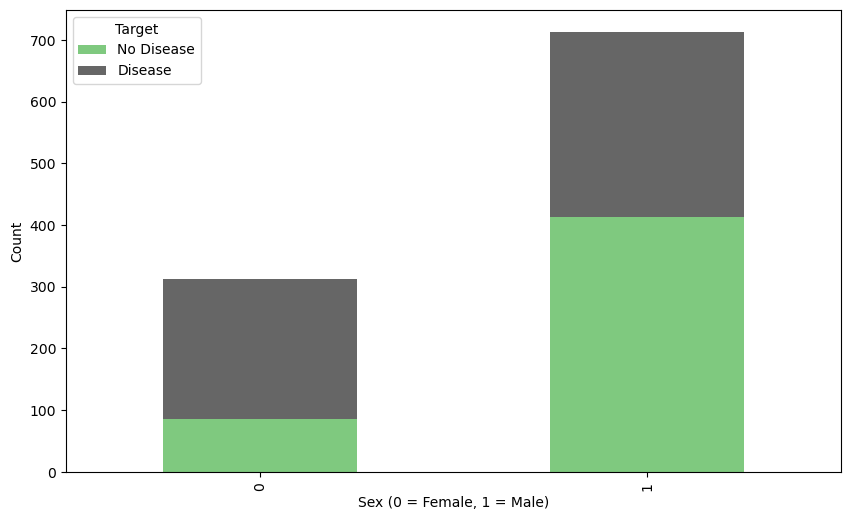

In [19]:
#  Stacked Bar Plot for Sex and Target
df_sex_target = df.groupby(["sex", "target"]).size().unstack(fill_value=0)
df_sex_target.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Accent")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"], title="Target")
plt.show()

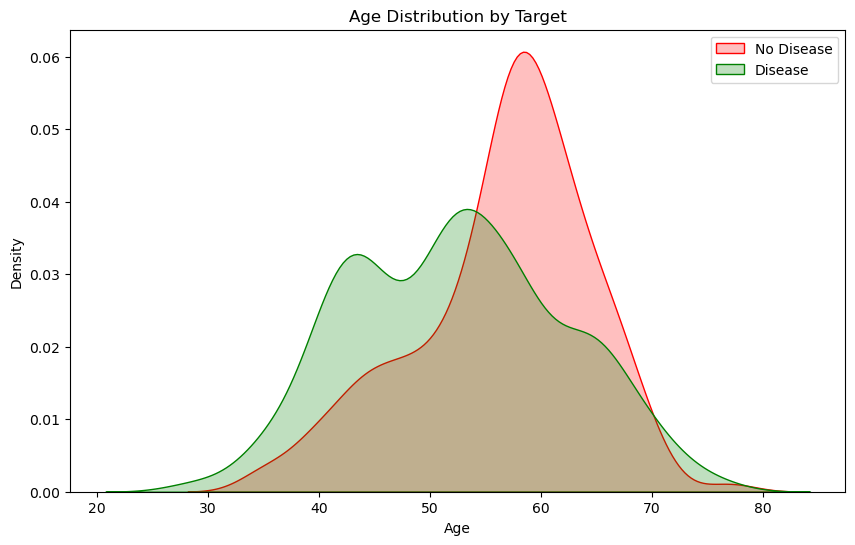

In [20]:
#  KDE Plot for Age by Target
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["target"] == 0]["age"], label="No Disease", shade=True, color="red")
sns.kdeplot(df[df["target"] == 1]["age"], label="Disease", shade=True, color="green")
plt.title("Age Distribution by Target")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

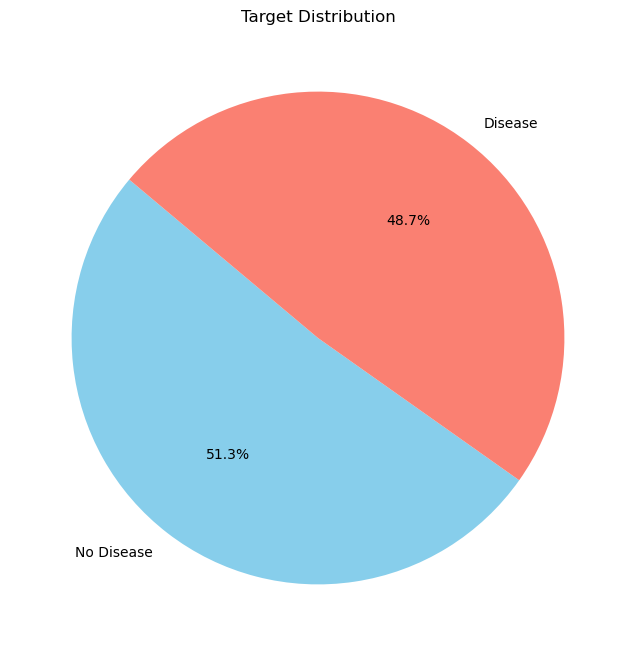

In [21]:
#  Pie Chart for Target Distribution
target_counts = df["target"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Target Distribution")
plt.show()

### Dataset preprocessing

In [22]:
# Define  features (X) and  target (y)
X = df.drop('target', axis=1)
y = df['target']

In [23]:
# this feature contuniose numbers 
# numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [24]:
#Standardizing numerical features
# scaler = StandardScaler()
# X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [27]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (820, 13)
Testing Features Shape: (205, 13)
Training Target Shape: (820,)
Testing Target Shape: (205,)


### Modeling

In [28]:
# Initialize and train the Gradient Boosting Classifier
gbc_model=GradientBoostingClassifier(n_estimators=10000, learning_rate=0.001 , max_depth=5 , random_state=42)

In [29]:
#train model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=10000,
                           random_state=42)

In [30]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [31]:
# # Make predictions
# x = {'age': [17], 'sex': [1], 'cp': [1], 'trestbps': [120], 'chol': [130], 'fbs': [0], 'restecg': [1], 'thalach': [140], 'exang': [0], 'oldpeak': [1.0], 'slope': [1], 'ca': [1], 'thal': [1]}
# data = pd.DataFrame(x)
# y_pred = gbc_model.predict(data)

In [32]:
# def collect_patient_data():
#     """
#     Foydalanuvchidan bemorning ma'lumotlarini qabul qilib, ularni lug'at shaklida qaytaradi.
#     """
#     data = {}

#     try:
#         # Ma'lumotlarni foydalanuvchidan qabul qilish
#         data['age'] = [int(input("Bemorning yoshi (raqamli): "))]
#         data['sex'] = [int(input("Jins (0 = Ayol, 1 = Erkak): "))]
#         data['cp'] = [int(input("Ko'krak og'rig'i turi (0-3): "))]
#         data['trestbps'] = [int(input("Dam olishdagi qon bosimi (mm Hg): "))]
#         data['chol'] = [int(input("Qon zardobidagi xolesterin (mg/dl): "))]
#         data['fbs'] = [int(input("Ochlikdagi qon shakar > 120 mg/dl (0 = Yo'q, 1 = Ha): "))]
#         data['restecg'] = [int(input("Dam olish elektrokardiografik natijalar (0-2): "))]
#         data['thalach'] = [int(input("Maksimal yurak urish tezligi (raqamli): "))]
#         data['exang'] = [int(input("Jismoniy mashqlar natijasida angina (0 = Yo'q, 1 = Ha): "))]
#         data['oldpeak'] = [float(input("ST depressiyasi (raqamli): "))]
#         data['slope'] = [int(input("Cho'qqisi mashqlar ST segmentining qiyaligi (0-2): "))]
#         data['ca'] = [int(input("Ftoroskopiya bilan ranglangan asosiy tomirlar soni (0-4): "))]
#         data['thal'] = [int(input("Talassemiya turi (0-3): "))]

#         return data

#     except ValueError:
#         print("Iltimos, ma'lumotlarni to'g'ri formatda kiriting!")
#         return None

# # Botni ishga tushirish
# if __name__ == "__main__":
#     print("Bemorning ma'lumotlarini kiriting:\n")
#     rd = collect_patient_data()
#     if rd:
#         print("Kiritilgan ma'lumotlar:\n", rd)

# data = pd.DataFrame(rd)
# print(gbc_model.predict(data))

In [33]:
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

In [34]:
# print(f"Accuracy: {accuracy:.2f}")

In [35]:
# print("\nConfusion Matrix:")
# print(conf_matrix)

In [36]:
# print("Classification Report:")
# print(class_report)

In [37]:
# data = {
#     'Ism': ['Ali', 'Vali', 'Salim'],
#     'Yosh': [25, 30, 35],
#     'Shahar': ['Toshkent', 'Samarqand', 'Buxoro']
# }
# df = pd.DataFrame(data)

# print(df)

In [38]:
# x = {'yoshi': [17], 'jins': [1], 'cp': [1], 'trestbps': [120], 'xol': [130], 'fbs': [0], 'restecg': [1], 'thalach': [140], 'exang': [0], 'oldpeak': [1.0], 'nishab': [1], 'ca': [1], 'thal': [1]}
# data = pd.DataFrame(x)
# scaler = StandardScaler()
# df =  scaler.fit_transform(data)
# df

In [39]:
# # Visualizing the Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [40]:
# # Plot feature importances
# feature_importances = pd.Series(gbc_model.feature_importances_, index=X.columns)
# feature_importances.sort_values(ascending=False, inplace=True)


In [41]:
# plt.figure(figsize=(10, 6))
# feature_importances.plot(kind='bar')
# plt.title("Feature Importances")
# plt.ylabel("Importance")
# plt.xlabel("Feature")
# plt.show()

In [42]:
import pickle

# Modelni saqlash
with open('df.pkl', 'wb') as file:
    pickle.dump(gbc_model, file)

In [43]:
def load_pkl_file(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
        print("Ma'lumot muvaffaqiyatli yuklandi!")
        return data
    except Exception as e:
        print(f"Xatolik yuz berdi: {e}")
        return None

file_path = "df.pkl"  
model = load_pkl_file(file_path)

Ma'lumot muvaffaqiyatli yuklandi!


In [44]:
# Make predictions
x = {'age': [17], 'sex': [1], 'cp': [1], 'trestbps': [120], 'chol': [130], 'fbs': [0], 'restecg': [1], 'thalach': [140], 'exang': [0], 'oldpeak': [1.0], 'slope': [1], 'ca': [1], 'thal': [1]}
data = pd.DataFrame(x)
y_pred = model.predict(data)

In [64]:
# def collect_patient_data():
#     """
#     Foydalanuvchidan bemorning ma'lumotlarini qabul qilib, ularni lug'at shaklida qaytaradi.
#     """
#     data = {}

#     try:
#         # Ma'lumotlarni foydalanuvchidan qabul qilish
#         data['age'] = [int(input("Bemorning yoshi (raqamli): "))]
#         data['sex'] = [int(input("Jins (0 = Ayol, 1 = Erkak): "))]
#         data['cp'] = [int(input("Ko'krak og'rig'i turi (0-3): "))]
#         data['trestbps'] = [int(input("Dam olishdagi qon bosimi (mm Hg): "))]
#         data['chol'] = [int(input("Qon zardobidagi xolesterin (mg/dl): "))]
#         data['fbs'] = [int(input("Ochlikdagi qon shakar > 120 mg/dl (0 = Yo'q, 1 = Ha): "))]
#         data['restecg'] = [int(input("Dam olish elektrokardiografik natijalar (0-2): "))]
#         data['thalach'] = [int(input("Maksimal yurak urish tezligi (raqamli): "))]
#         data['exang'] = [int(input("Jismoniy mashqlar natijasida angina (0 = Yo'q, 1 = Ha): "))]
#         data['oldpeak'] = [float(input("ST depressiyasi (raqamli): "))]
#         data['slope'] = [int(input("Cho'qqisi mashqlar ST segmentining qiyaligi (0-2): "))]
#         data['ca'] = [int(input("Ftoroskopiya bilan ranglangan asosiy tomirlar soni (0-4): "))]
#         data['thal'] = [int(input("Talassemiya turi (0-3): "))]

#         return data

#     except ValueError:
#         print("Iltimos, ma'lumotlarni to'g'ri formatda kiriting!")
#         return None

# # Botni ishga tushirish
# if __name__ == "__main__":
#     print("Bemorning ma'lumotlarini kiriting:\n")
#     rd = collect_patient_data()
#     if rd:
#         print("Kiritilgan ma'lumotlar:\n", rd)

# data = pd.DataFrame(rd)
# print(model.predict(data))

In [68]:
import telebot
from telebot.types import ReplyKeyboardMarkup, KeyboardButton
import json

bot = telebot.TeleBot('7651023409:AAFVwqQH9hsagxaEU_yjwi0L0IGKWn_tgbo')

user_data = {
    'age': [],
    'sex': [],
    'cp': [],
    'trestbps': [],
    'chol': [],
    'fbs': [],
    'restecg': [],
    'thalach': [],
    'exang': [],
    'oldpeak': [],
    'slope': [],
    'ca': [],
    'thal': []
}

@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(message.chat.id, "Salom! Iltimos, quyidagi savollarga javob bering:")
    ask_age(message)

def ask_age(message):
    bot.send_message(message.chat.id, "Bemorning yoshi (raqamli):")
    bot.register_next_step_handler(message, ask_sex)

def ask_sex(message):
    user_data['age'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Jins (0 = Ayol, 1 = Erkak):")
    bot.register_next_step_handler(message, ask_cp)

def ask_cp(message):
    user_data['sex'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Ko'krak og'rig'i turi (0-3):")
    bot.register_next_step_handler(message, ask_trestbps)

def ask_trestbps(message):
    user_data['cp'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Dam olishdagi qon bosimi (mm Hg):")
    bot.register_next_step_handler(message, ask_chol)

def ask_chol(message):
    user_data['trestbps'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Qon zardobidagi xolesterin (mg/dl):")
    bot.register_next_step_handler(message, ask_fbs)

def ask_fbs(message):
    user_data['chol'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Ochlikdagi qon shakar > 120 mg/dl (0 = Yo'q, 1 = Ha):")
    bot.register_next_step_handler(message, ask_restecg)

def ask_restecg(message):
    user_data['fbs'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Dam olish elektrokardiografik natijalar (0-2):")
    bot.register_next_step_handler(message, ask_thalach)

def ask_thalach(message):
    user_data['restecg'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Maksimal yurak urish tezligi (raqamli):")
    bot.register_next_step_handler(message, ask_exang)

def ask_exang(message):
    user_data['thalach'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Jismoniy mashqlar natijasida angina (0 = Yo'q, 1 = Ha):")
    bot.register_next_step_handler(message, ask_oldpeak)

def ask_oldpeak(message):
    user_data['exang'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "ST depressiyasi (raqamli):")
    bot.register_next_step_handler(message, ask_slope)

def ask_slope(message):
    user_data['oldpeak'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Cho'qqisi mashqlar ST segmentining qiyaligi (0-2):")
    bot.register_next_step_handler(message, ask_ca)

def ask_ca(message):
    user_data['slope'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Ftoroskopiya bilan ranglangan asosiy tomirlar soni (0-4):")
    bot.register_next_step_handler(message, ask_thal)

def ask_thal(message):
    user_data['ca'].append(message.text)  # Store the response as a list
    bot.send_message(message.chat.id, "Talassemiya turi (0-3):")
    bot.register_next_step_handler(message, finish)

def finish(message):
    user_data['thal'].append(message.text)  # Store the response as a list
    x = model.predict(pd.DataFrame(user_data))
    bot.send_message(message.chat.id, f"{x}")
    if x == [1]:
        bot.send_message(message.chat.id, 'Yurak kasalliklari va qon tomir tizimidagi muammolar, xususan, qon bosimi, xolesterin darajasi va yurak urish tezligi kabi omillar orqali yuzaga kelishi mumkin. Bu holatlarni vaqtida aniqlash muhim')
        # bot.send_message()
    if x == [0]:
        bot.send_message(message.chat.id, 'sizning yuraginggizda muammo topilmadi  ✅')
    bot.send_message(message.chat.id, "Rahmat! Ma'lumotlaringiz qabul qilindi.")


bot.polling()


In [7]:
user_data.keys

<function dict.keys>